In [55]:
using Oceananigans
using NCDatasets
using CairoMakie
using Printf

In [56]:
rootdir = "../data/raw_output/"
filelist = [e for e in readdir(rootdir) if e[1]!="."[1]]

1-element Vector{String}:
 "shear_instability_state_Ri=0.1.nc"

In [57]:
include("../src/shear_instability.jl");
ds = NCDataset(string(rootdir, filelist[1]), "r");
simulation = initialize_shear_layer(ds.attrib["Ri"], output_writer=false)
model = simulation.model
grid = simulation.model.grid;

[ Info: Setting initial conditions


In [5]:
ds = NCDataset(string(rootdir, filelist[1]), "r");
t = ds["time"];
c = ds["c"]
M = sum(c, dims=(1,2,3)); # mass of tracer

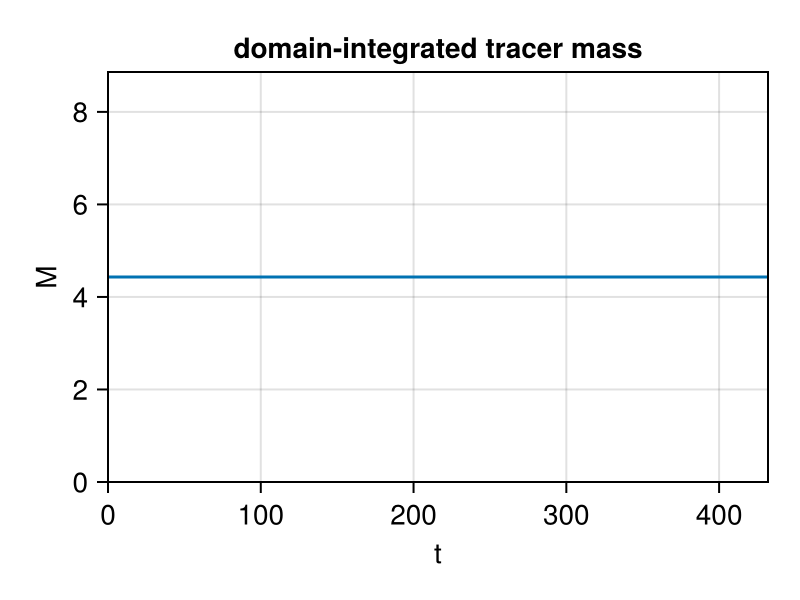

In [58]:
fig = Figure(size=(400, 300))
kwargs = (xlabel="t", ylabel="M", limits = ((0, maximum(ds["time"])), (0, nothing)))
title = @sprintf("domain-integrated tracer mass")
ax = Axis(fig[1, 1]; title = title, kwargs...)
lines!(ax, t, M[1,1,1,:])
fig

In [59]:
z = ds["zC"]
z̄ = sum(z.*c, dims=(1,2,3)) ./ M;

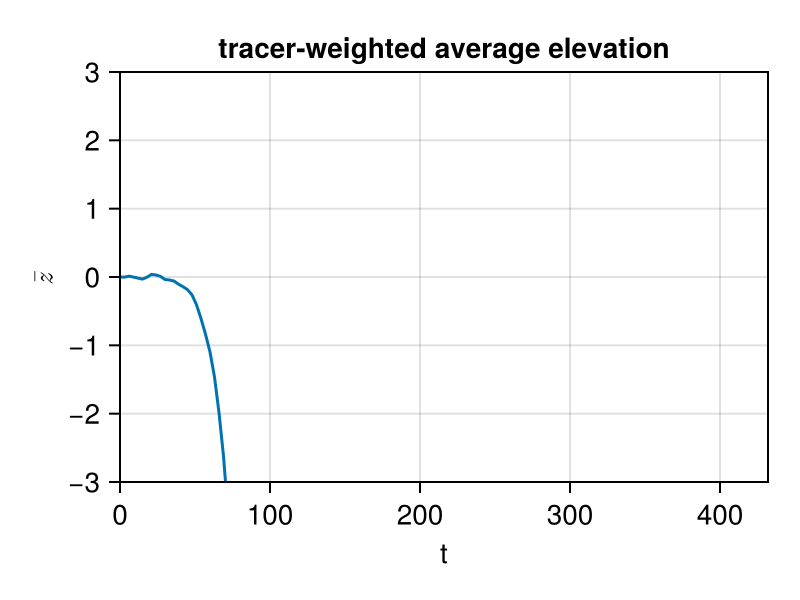

In [60]:
fig = Figure(size=(400, 300))
kwargs = (xlabel="t", ylabel=L"$\bar{z}$", limits = ((0, maximum(ds["time"])), (-3, 3)))
title = @sprintf("tracer-weighted average elevation")
ax = Axis(fig[1, 1]; title = title, kwargs...)
lines!(ax, t, z̄[1,1,1,:])
fig

In [61]:
zvar = sum((z.^2).*c, dims=(1,2,3)) ./ M;
zσ = sqrt.(zvar);

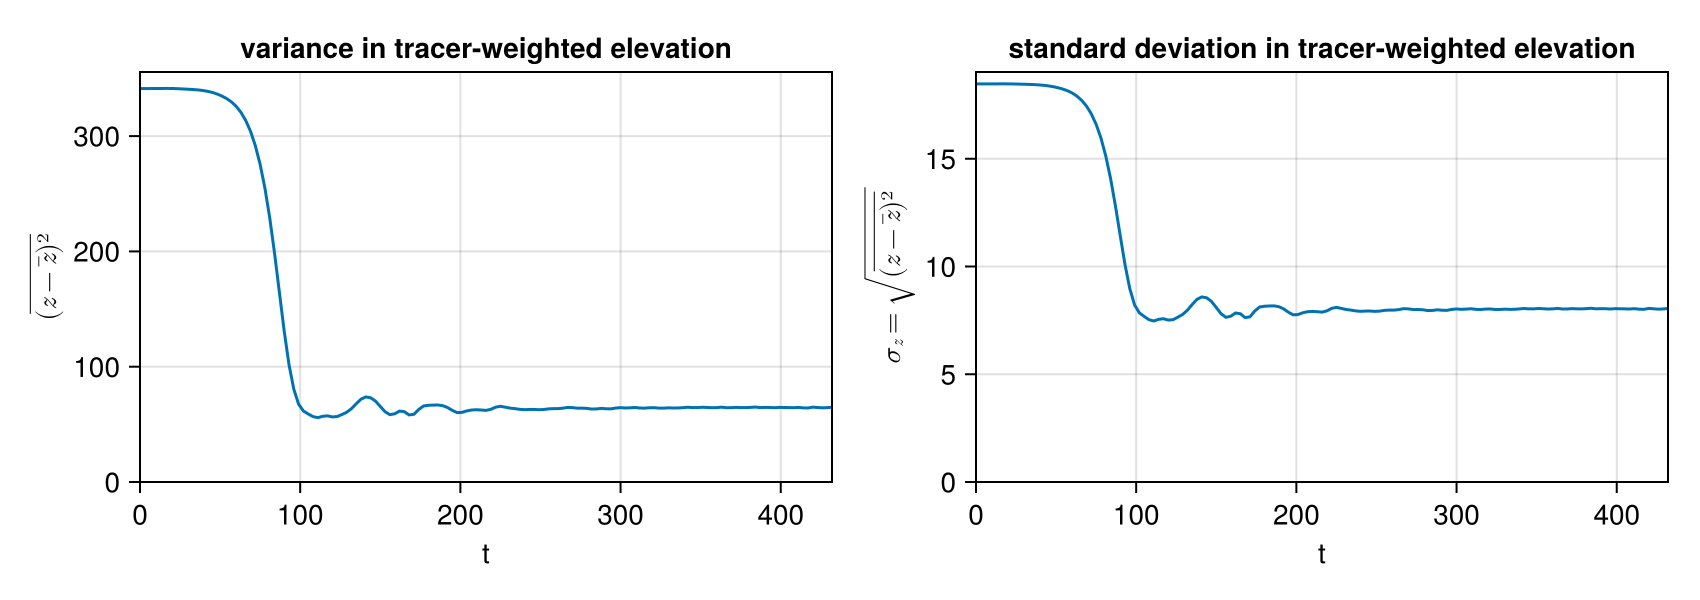

In [65]:
fig = Figure(size=(850, 300))
kwargs = (xlabel="t", ylabel=L"$\overline{(z-z̄)²}$", limits = ((0, maximum(ds["time"])), (0, nothing)))
title = @sprintf("variance in tracer-weighted elevation")
ax = Axis(fig[1, 1]; title = title, kwargs...)
lines!(ax, t, zvar[1,1,1,:])

kwargs = (xlabel="t", ylabel=L"$\sigma_{z} = \sqrt{\overline{(z-z̄)²}}$", limits = ((0, maximum(ds["time"])), (0, nothing)))
title = @sprintf("standard deviation in tracer-weighted elevation")
ax = Axis(fig[1, 2]; title = title, kwargs...)
lines!(ax, t, zσ[1,1,1,:])

fig

In [17]:
close(ds)

closed Dataset